<body >
    <div style="direction:rtl;line-height:300%;background-color:rgb(255, 255, 255);">
            <img src="./images/Fanni-Transparent.png" style="position:reletive;margin-top:25pt;float:right;" width="200" height="200"/>
    <img src="./images/University_of_Tehran_logo.svg" style="position:reletive;margin-top:25pt;margin-left:20pt;float:left;" width="150" height="150"/>
		<div align=center>
			<font  size=5 >
				<p></p>
				<p></p>
                <br>
                 بسمه تعالی
				<p></p>
			</font>
		</div>
        <div align=center >
                        <font size=30 >
                            <br>
                            گزارش همورک اول
                        </font>
         </div>
           <div align=center >
                        <font size=3 >
                            <br>
تهیه و تنظیم : سپهر سعیدپور
                            <br>
۸۱۰۱۹۶۶۵۴
                        </font>
        </div>
    </div>
</body>

# Question 1

* ابتدا بردار گرادیان و ماتریس هسیان را به دست می‌آوریم
* نقاط ایستا را محاسبه می‌کنیم
* برای هر پاسخ هسیان را محاسبه می‌کنیم
<br><br>
در عکس زیر مراحل بالا انجام شده است.

<!-- ![](./images/Q1.jpg) -->
<img src="./images/Q1.jpg" width="400">

# Question 2

**قسمت الف و ب و ج**
* الف: گرادیان را می‌گیریم و در نقطه صفر محاسبه می‌کنیم
* ب: در این قسمت مقدار گرادیان و تابع را حساب می‌کنیم و تابع را بر حسب الفا مینیم می‌کنیم
* ج: در این قسمت مقدار بتا را ۰.۵ در نظر می‌گیریم و مقدار الفا را با توجه به آرمیجیو محسابه می‌کنیم 

<img src="./images/Q2-1.jpg" width="400">

مقدار ۰.۱۲۵ با مقدار به دست آمده از روش الف تفاوت بیسیار کمی دارد. و همینطور طول گام خوبی برای به دست آوردن نقطه بعدی می‌باشد

* د: سعی می‌کنیم با استفاده از الگوریتم نقاط بعدی را محاسبه کنیم

<img src="./images/Q2-2.jpg" width="400">

نتایج به دست آمده بسیار به هم شبیه هستند. به خاطر اینکه در اینجا تابع ما درجه ۲ بود. روش معمولی راحت‌تر پاسخ می‌داد. اما در صورتی که توابع پیچیده‌تر شوند، روش ارمیجیو بهتر و بهینه‌تر عمل خواهد کرد

#  Question 3: SVM Implementation

##  مراحل پیاده‌سازی الگوریتم ماشین بردار پشتیبان


* ابتدا ابرصفحه را با وزن‌دهی اولیه مشخص می‌کنیم
* سپس با استفاده از تابع هزینه تعریف شده و مشتق آن و الگوریتم گرادیان کاهشی ابرصفحه را به دست می‌آوریم
    * با این روش ابر صفحه‌ای فیت می‌شود که بیشترین حاشیه را داشته باشد.
* قسمت قبل را به تعداد ایپاک‌ها تکرار می‌کنیم تا به اپتیامیز ترین حالت برسیم
*  سپس با صفحه‌هایی برای هر کدام برای هر لیبل فیت شده‌اند مقدار فاصله از صفحه را برای هر داده محاسبه می‌کنیم
* بیشترین (از لحاظ مثبت بودن) را به به عنوان لیبل در نظر می‌گیریم و پیش‌بینی می‌کنیم


In [2]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [3]:
path_datests = './datasets'
path_Q4_data = '{data}/Question 3/'.format(data = path_datests)

def read_csv_datasets(train_data_name, test_data_name):
    train_data = pd.read_csv(path_Q4_data + train_data_name)
    train_data['intercept'] = 1
    test_data = pd.read_csv(path_Q4_data + test_data_name)
    test_data['intercept'] = 1
    return [train_data, test_data]

# loss function implementation
def hinge_loss_function(W, X, Y):
    return (1 / X.shape[0]) * np.sum([max(0, 1 - Y[i] * np.dot(X[i], W)) for i in range(X.shape[0])])

def SVM_loss_function(W, X, Y, la):
    return (la * np.sum(W**2) +  hinge_loss_function(W, X, Y))

# gradient of loss function implementation
def indicator_function(W, x, y):
    if(0 >= 1 - y*(np.dot(x, W))):
        return 0
    else:
        return (-1)

def SVM_loss_gradient_function(W, X, Y, la):
    
    if (type(Y) == np.int32):
        Y_batch = np.array([Y])
        X_batch = np.array([X])
        N  = X_batch.shape[0]
    else:
        Y_batch = Y
        X_batch = X
        N  = X_batch.shape[0]
        
    hinge_gradient = []
    if(N == 1):
        hinge_gradient = indicator_function(W, X_batch[0], Y_batch[0]) * X_batch[0] * Y_batch[0]
    else:
        hinge_gradient = np.sum([indicator_function(W, X_batch[i], Y_batch[i]) * X_batch[i] * Y_batch[i]  for i in range(N)], axis=0)
    
    return (2 * la * W + 1/N * hinge_gradient )
   
# implementation of BGD & SGD (with mini-batch)
def GD(X, Y, max_epochs = 100, mini_batch_size = 100, learning_rate = 0.01, hyperparameter = 0.1, method = 'SGD', decreasing_LR = False):
    
    W = np.random.normal(loc = 0, scale = 0.1, size = X.shape[1])
    nth = 0
    for epoch in range(0, max_epochs + 1):
        lr = learning_rate
        X_, Y_ = shuffle(X, Y, n_samples = mini_batch_size)
        for i in range(X_.shape[0]):
            if(method == 'SGD'):
                ascent = SVM_loss_gradient_function(W, X_[i], Y_[i], la = hyperparameter)
            elif(method  == 'BGD'):
                ascent = SVM_loss_gradient_function(W, X_, Y_, la = hyperparameter)
            
            W = W - (lr * ascent)
            if(decreasing_LR):
                lr = lr / (i+1)
    return W

# One VS. All SVM Classifier

def train_SVM_OvA_multipleclass(train_data, epochs_for_every_GD = 100, learning_rate = 1e-4, hyperparameter = 1e-4, method = 'SGD',  decreasing_LR = False):
    labels = [0,1,2,3,4,5,6,7,8,9]
    features = np.array(train_data.drop(columns = ['label']) )
    Ws = []
    for i in labels:
        labels = np.where(train_data['label'] == i, 1 , -1)
        W = GD(features, labels, max_epochs = epochs_for_every_GD, mini_batch_size = 100,
               learning_rate = learning_rate, hyperparameter = hyperparameter, method = method,  decreasing_LR = False)
        
        Ws.append(W)
    return np.array(Ws)

# predict & calcukate accuracy
def predict_test_set(weights, test_data):
    preds = []
    labels = [0,1,2,3,4,5,6,7,8,9]
    for row in test_data.itertuples():
        d = np.array(row[2:])
        result = list(np.matmul(weights,d))
        prediction = result.index(max(result))
        preds.append(labels[prediction])
    return np.array(preds)

def calc_model_accuracy(predictions, test_lables):
    return (sum(predictions == test_lables) / len(predictions)) 

# split dataset to folds for cross-validation
def cross_validation_split(data, num_folds = 5):
    folds_size = (data.shape[0] // num_folds)
    folds = []
    for i in range(num_folds):
        validation = data.iloc[range((i*folds_size),((i+1)*folds_size))].reset_index()
        train = data.drop(range((i*folds_size),((i+1)*folds_size))).reset_index()
        folds.append((train, validation))
    return folds

# Cross-validation to choose best lambda (hyperparameter)
def SVM_with_cross_validation_for_choose_lambda(train_data, epochs_for_every_GD = 100, learning_rate = 1e-4, hyperparameter = 1e-10, method = 'SGD', num_folds = 5):
    
    folds = cross_validation_split(train_data, num_folds = num_folds)
    mean_accuracy = 0
    for train, validation in folds:
        weights = train_SVM_OvA_multipleclass(train,epochs_for_every_GD  = epochs_for_every_GD,
                                   learning_rate = learning_rate, hyperparameter = hyperparameter, method = 'SGD')
        
        predictions = predict_test_set(weights, validation)
        
        mean_accuracy += (calc_model_accuracy(predictions, validation['label']) / num_folds)
        
    return mean_accuracy
        

In [5]:
# import datasets
train_data, test_data = read_csv_datasets('mnist_train.csv','mnist_test.csv')

## قسمت ب: پیدا کردن بهترین لامبدا
در این قسمت با پیاده‌سازی الگوریتم کراس ولیدیشن بهترین لامبدا را پیدا می‌شود.

In [43]:
lambdas = [1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1]
accuracies = []
for la in lambdas:
    accuracy = SVM_with_cross_validation_for_choose_lambda(train_data, epochs_for_every_GD = 100, learning_rate = 1e-4,
                              hyperparameter = la, method = 'SGD', num_folds = 5)
    accuracies.append(accuracy)
    

#### با توجه نمودار زیر که بر حسب لگاریتم رسم شده‌است بهترین لامبدا در توان منفی ۴ قرار دارد

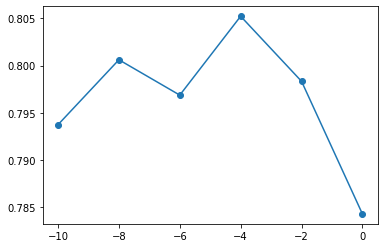

In [57]:
plt.plot(np.log10(lambdas), accuracies, linestyle='-',marker='o')

## قسمت ج: پیاده‌سازی الگوریتم با روش‌های بچ واستوکستیک
#### دقت SGD را می‌توان در زیر دید

In [60]:
best_lambda = 1e-4

weights = train_SVM_OvA_multipleclass(train_data, epochs_for_every_GD = 100, learning_rate = 1e-4,
                            hyperparameter = best_lambda, method = 'SGD')
predictions = predict_test_set(weights, test_data)
print("accuracy on test dataset: {}".format(calc_model_accuracy(predictions, test_data['label'])))


accuracy on test dataset: 0.8181


##### دقت مدل BGD 

In [61]:
best_lambda = 1e-4

weights = train_SVM_OvA_multipleclass(train_data, epochs_for_every_GD = 100, learning_rate = 1e-4,
                            hyperparameter = best_lambda, method = 'BGD')
predictions = predict_test_set(weights, test_data)
print("accuracy on test dataset: {}".format(calc_model_accuracy(predictions, test_data['label'])))


accuracy on test dataset: 0.8162


## قسمت د: کشیدن دقت مدل با تکرار‌های مختلف

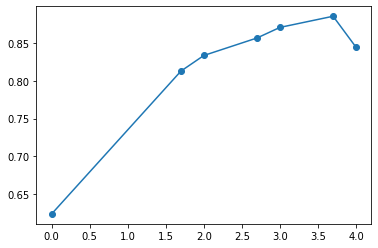

In [82]:
best_lambda = 1e-4
epochs = [1, 50, 100, 500, 1000, 5000, 10000]
accuracies = []
for epoch in epochs:
    weights = train_SVM_OvA_multipleclass(train_data, epochs_for_every_GD = epoch, learning_rate = 1e-4,
                              hyperparameter = best_lambda, method = 'SGD')
    preds = predict_test_set(weights, test_data)
    accuracies.append(calc_model_accuracy(preds, test_data['label']))
    
plt.plot(np.log10(epochs), accuracies, linestyle='-',marker='o' )

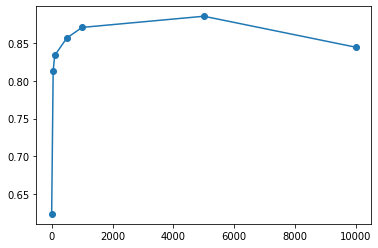

In [83]:
plt.plot((epochs), accuracies, linestyle='-',marker='o' )

## قسمت د: کشیدن دقت مدل با تکرار‌های مختلف در حالت لرنینگ ریت کاهشی

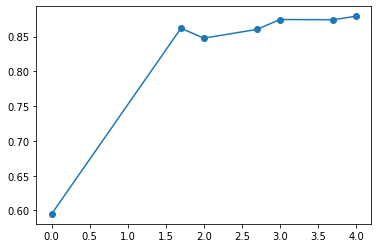

In [6]:
best_lambda = 1e-4
epochs = [1, 50, 100, 500, 1000, 5000, 10000]
accuracies = []
for epoch in epochs:
    weights = train_SVM_OvA_multipleclass(train_data, epochs_for_every_GD = epoch, learning_rate = 1e-4,
                              hyperparameter = best_lambda, method = 'SGD', decreasing_LR=True)
    preds = predict_test_set(weights, test_data)
    accuracies.append(calc_model_accuracy(preds, test_data['label']))
    
plt.plot(np.log10(epochs), accuracies, linestyle='-',marker='o' )

#### به نظر هر چه تعداد تکرار بالاتر برود دقت نیز بالاتر می‌رود. همینطور با کاهش لرنینگ ریت این مقدار بهتر و بهتر می‌شود.

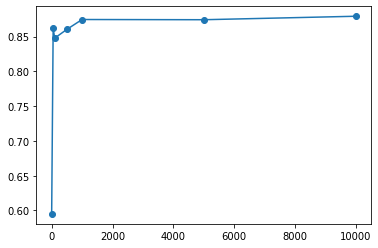

In [11]:
plt.plot((epochs), accuracies, linestyle='-',marker='o' )

# Question 4: KNN Implementation

 برای هر مقدار 
K مراحل زیر را طی می کنیم :
* فاصله ی نقطه تست را از نقطه‌ها بدست می آوریم
* فاصله های از کم به زیاد مرتب کرده و اندیس K تا نزدیک ترین نقطه را می گیریم
* براساس این اندیس ها ، نقطه‌ها های همسایه را پیدا می کنیم
* براساس لیبل همسایه ها ، مشخص می کنیم که لیبل نقطه تست موردنظر چیست
* درآخر با محاسبه ی فاصله ی لیبل های تست و لیبل های پیش بینی شده ارزیابی می کنیم که کدوم مقدار K بهترین پیش بینی را دارد.


In [14]:
# requierments
import pandas as pd
import numpy as np
import operator
import random
import matplotlib.pyplot as plt

In [15]:
path_datests = './datasets'
path_Q4_data = '{data}/Question 4/'.format(data = path_datests)

def read_csv_datasets(train_data_name, test_data_name):
    train_data = pd.read_csv(path_Q4_data + train_data_name, header=None)
    test_data = pd.read_csv(path_Q4_data + test_data_name, header=None)
    return [train_data, test_data]

def distance_calculator(vec1, vec2, how = 'euclidean'):
    vec1 = np.array(vec1)
    vec2 = np.array(vec2)

    if (how == 'euclidean'): 
        return np.linalg.norm(vec1 - vec2)
    elif(how == 'd1'): 
        return np.max(vec1 - vec2)
    elif(how == 'hamming'):
        return np.sum(np.abs(vec1 - vec2))
    else:
        return
    
def KNN(training_set, training_labels, test_instance, k, how_mesure_distance = 'euclidean', optimized = True):

    distances = {}
    if(optimized):
        if(how_mesure_distance == 'euclidean'):
            distances = (training_set -  test_instance).T.apply(np.linalg.norm)
        elif(how_mesure_distance == 'd1'):
            distances = (training_set -  test_instance).T.apply(np.max)
        elif(how_mesure_distance == 'hamming'):
            distances = (training_set -  test_instance).T.apply(np.abs).apply(np.sum)
        
        distances = dict(distances)
        
    else:
        for row in training_set.itertuples():
            distances[row[0]] = distance_calculator(np.array(row[1:]), np.array(test_instance), how = 'euclidean')

    
    sorted_distances = {j: v for j, v in sorted(distances.items(), key=lambda item: item[1])}

    
    dist_of_NNs = list(sorted_distances.values())[:k]
    ids_of_NNs = list(sorted_distances.keys())[:k]
    classes_of_NNs = list(training_labels.iloc[ids_of_NNs].iloc[:,0])
    
    
    K_nearest_neighbours = {}
    K_nearest_neighbours['class'] = classes_of_NNs
    K_nearest_neighbours['distance'] = dist_of_NNs
    
    
    return pd.DataFrame(K_nearest_neighbours)

def random_majority_vote(nearest_neighbours):
    class_votes = dict(nearest_neighbours['class'].value_counts())
    max_vote = max(class_votes.values())
    top_votes = [k for k,v in class_votes.items() if v == max_vote]
    if(len(top_votes) < 2):
        return top_votes[0]
    else:
        return random.choice(top_votes)
    
def weighted_majority_vote(nearest_neighbours):
    weighted_class_votes = {}
    for class_name,group in nearest_neighbours.groupby('class'):
        weighted_class_votes[class_name] = 0
        for i, row in group.iterrows():
            weighted_class_votes[class_name] += (1/row['distance'])
        
    max_vote_class = (max(weighted_class_votes.keys(), key=(lambda key: weighted_class_votes[key])))
    
    return max_vote_class
    
def majority_vote(nearest_neighbours, break_ties_method = 'weighted'):

    if(break_ties_method == 'random'):
        return random_majority_vote(nearest_neighbours)
        
    elif(break_ties_method == 'weighted'):
        return weighted_majority_vote(nearest_neighbours)
    
def predict_test_data_KNN(training_set, training_labels, test_set, k = 10, how_mesure_distance = 'euclidean', break_ties_method = 'random'):
    predictions = []
    
    for test_instance in test_set.itertuples():
        
        nearest_neighbors = KNN(training_set, training_labels, np.array(test_instance[1:]),
                                k = k,
                                how_mesure_distance = how_mesure_distance)
        predicted_class = majority_vote(nearest_neighbors,
                                        break_ties_method = break_ties_method)
        predictions.append(predicted_class)
    return(pd.Series(predictions))

def calculate_accuracy(test, prediction):
    try:
        return (sum(test == prediction)/len(prediction))
    except:
        return pd.NA
    
def normalize_dataset(data):
    try:
        return (data - data.min()) / (data.max() - data.min())
    except:
        return pd.NA
    

In [16]:
train_data, test_data = read_csv_datasets('train_data.csv', 'test_data.csv')
train_label, test_label = read_csv_datasets('train_labels.csv', 'test_labels.csv')

In [151]:
Ks = [2,5,10,50]
accuracies = []
for k in Ks:
    predictions = predict_test_data_KNN(train_data, train_label, test_data, k = k, how_mesure_distance = 'euclidean', break_ties_method = 'random')
    accuracies.append(calculate_accuracy(test_label.iloc[:,0], predictions))

### همانطور که در پایین دیده می‌شود بهترین حالت برای ۲ اتفاق افتاده است اما دقت‌ها  بسیار پایین است

Text(0, 0.5, 'Accuracy')

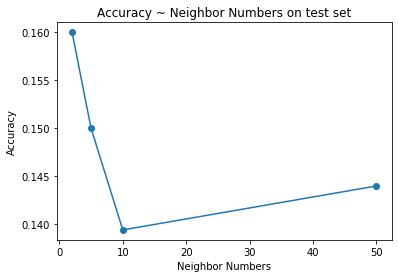

In [162]:
ax = pd.Series(data=accuracies, index=Ks).plot(kind = 'line', linestyle='-',
                                          marker='o',
                                          title = 'Accuracy ~ Neighbor Numbers on test set')
ax.set_xlabel("Neighbor Numbers")
ax.set_ylabel("Accuracy")

In [274]:
best_k = 2
predictions = predict_test_data_KNN(train_data, train_label, test_data, k = best_k, how_mesure_distance = 'd1', break_ties_method = 'random')
accuracy_d1 = (calculate_accuracy(test_label.iloc[:,0], predictions))

### دقت برای دی۱

In [276]:
accuracy_d1

0.14057142857142857

In [275]:
best_k = 2
predictions = predict_test_data_KNN(train_data, train_label, test_data, k = best_k, how_mesure_distance = 'hamming', break_ties_method = 'random')
accuracy_hamming = (calculate_accuracy(test_label.iloc[:,0], predictions))

### دقت برای دی۲

In [277]:
accuracy_hamming

0.1462857142857143

### با توجه به اینکه دقت مدل پایین بود. باید راه‌کاری بهتر کردن مدل ارائه داد یکی از این راه‌کارها نرمالایز کردن داده‌هاست. با نرمالایز کردن می‌توان همه ابعاد را به یک شکل دید. و دسته‌بندی را ساده‌تر انجام داد. چرا که ممکن است یک بعد بسیار از بقیه بیشتر باشد و باعث اوت لایر شدن اون داده‌ها بشود.

In [17]:
train_data_normalized = normalize_dataset(train_data)
test_data_normalized = normalize_dataset(test_data)

In [271]:
Ks = [2,5,10,50]
accuracies_normalized = []
for k in Ks:
    predictions = predict_test_data_KNN(train_data_normalized, train_label, test_data_normalized, k = k, how_mesure_distance = 'euclidean', break_ties_method = 'random')
    accuracies.append(calculate_accuracy(test_label.iloc[:,0], predictions))

Text(0, 0.5, 'Accuracy')

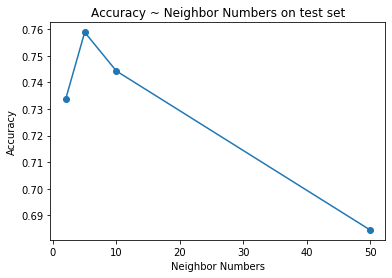

In [273]:
ax = pd.Series(data=accuracies[4:], index=Ks).plot(kind = 'line', linestyle='-',
                                          marker='o',
                                          title = 'Accuracy ~ Neighbor Numbers on normalized dataset test set')
ax.set_xlabel("Neighbor Numbers")
ax.set_ylabel("Accuracy")

همانطور که می‌بینیم با نرمالایز کردن داده‌ها دقت به شدت افزایش یافت

In [18]:
best_k = 5
predictions = predict_test_data_KNN(train_data_normalized, train_label, test_data_normalized, k = best_k, how_mesure_distance = 'hamming', break_ties_method = 'random')
accuracy_hamming = (calculate_accuracy(test_label.iloc[:,0], predictions))
accuracy_hamming

0.7917142857142857

In [20]:
best_k = 5
predictions = predict_test_data_KNN(train_data_normalized, train_label, test_data_normalized, k = best_k, how_mesure_distance = 'd1', break_ties_method = 'random')
accuracy_d1 = (calculate_accuracy(test_label.iloc[:,0], predictions))
accuracy_d1

0.502